In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Setup complete!
Current directory: /content/drive/MyDrive/CNET-Iteration-2
 All imports successful!

LOADING PREPROCESSED DATA
Training data shape: (47887, 10, 79)
Validation data shape: (157253, 10, 79)
Validation labels shape: (157253,)

Sequence length: 10
Number of features: 79

BUILDING LSTM AUTOENCODER
✅ Model built successfully!


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10, 79)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 10, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 79)         │         5,135 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,567 (342.06 KB)

 Trainable params: 87,567 (342.06 KB)

 Non-trainable params: 0 (0.00 B)

None

TRAINING LSTM AUTOENCODER
Epoch 1/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 92s 56ms/step - loss: 0.0190 - mean_absolute_error: 0.0527 - val_loss: 0.0154 - val_mean_absolute_error: 0.0470
Epoch 2/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 74s 49ms/step - loss: 0.0117 - mean_absolute_error: 0.0387 - val_loss: 0.0180 - val_mean_absolute_error: 0.0484
Epoch 3/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - loss: 0.0088 - mean_absolute_error: 0.0313 - val_loss: 0.0171 - val_mean_absolute_error: 0.0436
Epoch 4/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - loss: 0.0070 - mean_absolute_error: 0.0266 - val_loss: 0.0168 - val_mean_absolute_error: 0.0411
Epoch 5/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - loss: 0.0057 - mean_absolute_error: 0.0234 - val_loss: 0.0174 - val_mean_absolute_error: 0.0409
Epoch 6/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - loss: 0.0049 - mean_absolute_error: 0.0213 - val_loss: 0.0171 - val_mean_absolute_error: 0.0395
Epoch 7/50
1497/1497 ━━━━━━━━━━━━━━━━━━━━ 77

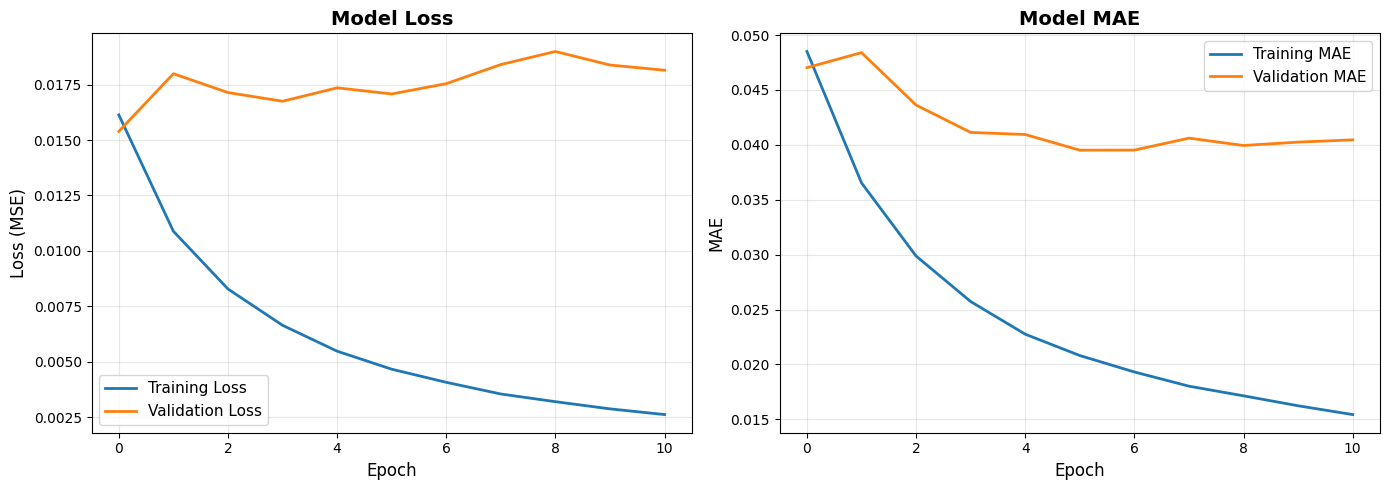

 Training history plot saved!

SAVING LSTM AUTOENCODER
✅ Model saved to results/models/lstm_autoencoder_final.keras

EXTRACTING LATENT FEATURES
Extracting features from training data...
Latent features shape: (47887, 32)
Extracting features from validation data...
Validation latent features shape: (157253, 32)

TRAINING ONE-CLASS SVM
Training One-Class SVM...
✅ OC-SVM training complete!

SAVING ONE-CLASS SVM
✅ OC-SVM saved to results/models/oc_svm.pkl

QUICK VALIDATION CHECK

Quick Validation Accuracy: 0.8897 (88.97%)

Prediction Distribution:
  Normal (0): 33660
  Attack (1): 123593

TRAINING COMPLETE - SUMMARY

 All models trained and saved successfully!

Saved files:
  1. results/models/lstm_autoencoder_final.keras
  2. results/models/oc_svm.pkl
  3. results/figures/training_history.png

You can now run the evaluation notebook!


In [3]:

import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Set paths
PROJECT_PATH = '/content/drive/MyDrive/CNET-Iteration-2'
sys.path.append(f'{PROJECT_PATH}/src')

# Change to project directory
os.chdir(PROJECT_PATH)

print(" Setup complete!")
print(f"Current directory: {os.getcwd()}")

# === CELL 2: Import Libraries ===
import pickle
import numpy as np
import matplotlib.pyplot as plt
from model import LSTMAutoencoder, OneClassSVMClassifier

print(" All imports successful!")

# === CELL 3: Load Preprocessed Data ===
print("\n" + "="*60)
print("LOADING PREPROCESSED DATA")
print("="*60)

with open('data/processed/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_val = data['X_val']
y_val = data['y_val']

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

# Get dimensions
sequence_length = X_train.shape[1]
n_features = X_train.shape[2]

print(f"\nSequence length: {sequence_length}")
print(f"Number of features: {n_features}")

# === CELL 4: Build LSTM Autoencoder ===
print("\n" + "="*60)
print("BUILDING LSTM AUTOENCODER")
print("="*60)

# Initialize model
lstm_ae = LSTMAutoencoder(
    sequence_length=sequence_length,
    n_features=n_features,
    latent_dim=32
)

# Build model
lstm_ae.build_model()

# === CELL 5: Train LSTM Autoencoder ===
print("\n" + "="*60)
print("TRAINING LSTM AUTOENCODER")
print("="*60)

# Train model
history = lstm_ae.train(
    X_train=X_train,
    X_val=X_val,
    epochs=50,
    batch_size=32
)

print("\n Training complete!")

# === CELL 6: Plot Training History ===
print("\n" + "="*60)
print("PLOTTING TRAINING HISTORY")
print("="*60)

plt.figure(figsize=(14, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE', linewidth=2)
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', linewidth=2)
plt.title('Model MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Training history plot saved!")

# === CELL 7: Save LSTM Model ===
print("\n" + "="*60)
print("SAVING LSTM AUTOENCODER")
print("="*60)

lstm_ae.save_model('results/models/lstm_autoencoder_final.keras')

#  CELL 8: Extract Latent Feature
print("\n" + "="*60)
print("EXTRACTING LATENT FEATURES")
print("="*60)


print("Extracting features from training data...")
latent_features_train = lstm_ae.extract_latent_features(X_train)
print(f"Latent features shape: {latent_features_train.shape}")

# Extract for validation
print("Extracting features from validation data...")
latent_features_val = lstm_ae.extract_latent_features(X_val)
print(f"Validation latent features shape: {latent_features_val.shape}")

# === CELL 9: Train One-Class SVM ===
print("\n" + "="*60)
print("TRAINING ONE-CLASS SVM")
print("="*60)

# Initialize OC-SVM
oc_svm = OneClassSVMClassifier(kernel='rbf', nu=0.1, gamma='auto')

# Train on latent features (normal traffic only)
oc_svm.train(latent_features_train)

# === CELL 10: Save OC-SVM ===
print("\n" + "="*60)
print("SAVING ONE-CLASS SVM")
print("="*60)

oc_svm.save_model('results/models/oc_svm.pkl')

# === CELL 11: Quick Validation ===
print("\n" + "="*60)
print("QUICK VALIDATION CHECK")
print("="*60)

# Make predictions on validation data
y_pred = oc_svm.predict(latent_features_val)

# Convert predictions (-1, 1) to (1, 0)
y_pred_binary = np.where(y_pred == 1, 0, 1)

# Calculate quick accuracy
accuracy = np.mean(y_pred_binary == y_val)
print(f"\nQuick Validation Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Class distribution in predictions
unique, counts = np.unique(y_pred_binary, return_counts=True)
print(f"\nPrediction Distribution:")
print(f"  Normal (0): {counts[0] if 0 in unique else 0}")
print(f"  Attack (1): {counts[1] if 1 in unique else 0}")

# === CELL 12: Final Summary ===
print("\n" + "="*60)
print("TRAINING COMPLETE - SUMMARY")
print("="*60)
print("\n All models trained and saved successfully!")
print("\nSaved files:")
print("  1. results/models/lstm_autoencoder_final.keras")
print("  2. results/models/oc_svm.pkl")
print("  3. results/figures/training_history.png")
print("\nYou can now run the evaluation notebook!")
print("="*60)